In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [2]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
covid = BayesNet()
covid.load_from_bifxml('testing/Use_Case.BIFXML')

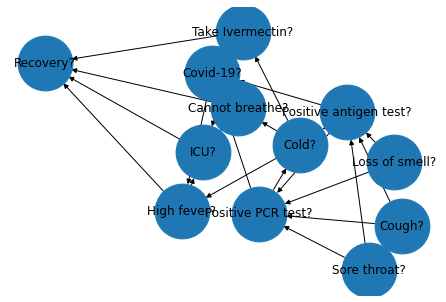

In [4]:
covid.draw_structure()

In [5]:
covid.get_all_variables()

['Cough?',
 'Loss of smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [6]:
covid.get_all_cpts()

{'Cough?':    Cough?     p
 0   False  0.95
 1    True  0.05, 'Loss of smell?':    Loss of smell?     p
 0           False  0.99
 1            True  0.01, 'Sore throat?':    Sore throat?     p
 0         False  0.98
 1          True  0.02, 'Positive PCR test?':     Cough?  Loss of smell?  Sore throat?  Positive antigen test?  \
 0    False           False         False                   False   
 1    False           False         False                   False   
 2    False           False         False                    True   
 3    False           False         False                    True   
 4    False           False          True                   False   
 5    False           False          True                   False   
 6    False           False          True                    True   
 7    False           False          True                    True   
 8    False            True         False                   False   
 9    False            True         False        

In [7]:
covid.get_children('ICU?')

['Recovery?']

In [8]:
covid.get_all_edges()

[('Cough?', 'Positive PCR test?'),
 ('Cough?', 'Positive antigen test?'),
 ('Loss of smell?', 'Positive PCR test?'),
 ('Loss of smell?', 'Positive antigen test?'),
 ('Sore throat?', 'Positive PCR test?'),
 ('Sore throat?', 'Positive antigen test?'),
 ('Positive PCR test?', 'Cold?'),
 ('Positive PCR test?', 'Covid-19?'),
 ('Positive antigen test?', 'Positive PCR test?'),
 ('Positive antigen test?', 'Cold?'),
 ('Positive antigen test?', 'Covid-19?'),
 ('Covid-19?', 'Take Ivermectin?'),
 ('Covid-19?', 'High fever?'),
 ('Covid-19?', 'Cannot breathe?'),
 ('Cold?', 'Take Ivermectin?'),
 ('Cold?', 'High fever?'),
 ('Cold?', 'Cannot breathe?'),
 ('Cannot breathe?', 'ICU?'),
 ('Cannot breathe?', 'Recovery?'),
 ('High fever?', 'ICU?'),
 ('High fever?', 'Recovery?'),
 ('Take Ivermectin?', 'ICU?'),
 ('Take Ivermectin?', 'Recovery?'),
 ('ICU?', 'Recovery?')]

## a) d-separation 

In [9]:
reasoner = BNReasoner(covid)

In [10]:
x = ['Sore throat?', 'Cold?']
y = ['Cough?', 'ICU?']
z = ['Take Ivermectin?']
reasoner.d_separation(x, y, z)

False

## b) Ordering

In [11]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree(covid)

Mindegree heuristic: 


['Cough?',
 'Loss of smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [12]:
print('Minfill heuristic: ')

reasoner.ordering_minfill(covid)

Minfill heuristic: 


['Cough?',
 'Loss of smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

# c) Network Pruning

In [13]:
q = ['ICU?']
e = pd.Series({'Covid-19?': True, 'Cold?': False})

pruned = reasoner.net_prune(q, e)

In [14]:
pruned.get_cpt('ICU?')

,Cannot breathe?,High fever?,Take Ivermectin?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


## d) Marginal distributions

### summing-out: 

In [15]:
factor = covid.get_cpt('ICU?')
factor

,Cannot breathe?,High fever?,Take Ivermectin?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


In [16]:
reasoner.sum_out(factor, ['ICU?'])

,Cannot breathe?,High fever?,Take Ivermectin?,p
0,False,False,False,1.0
1,False,False,True,1.0
2,False,True,False,1.0
3,False,True,True,1.0
4,True,False,False,1.0
5,True,False,True,1.0
6,True,True,False,1.0
7,True,True,True,1.0


### multiplying

In [17]:
hospital = covid.get_cpt('ICU?')
hospital

,Cannot breathe?,High fever?,Take Ivermectin?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


In [18]:
Joe_Rogan = covid.get_cpt('Take Ivermectin?')
Joe_Rogan

,Covid-19?,Cold?,Take Ivermectin?,p
0,False,False,False,1.000
1,False,False,True,0.000
2,False,True,False,0.995
3,False,True,True,0.005
4,True,False,False,0.950
5,True,False,True,0.050
6,True,True,False,0.950
7,True,True,True,0.050


In [19]:
hospital = covid.get_cpt('ICU?')
Joe_Rogan = covid.get_cpt('Take Ivermectin?')

In [20]:
reasoner.mult([Joe_Rogan, hospital])

,Covid-19?,Cold?,Take Ivermectin?,Cannot breathe?,High fever?,ICU?,p
0,False,False,False,False,False,False,1.0000
1,False,False,False,False,False,True,0.0000
2,False,False,False,False,True,False,0.6000
3,False,False,False,False,True,True,0.4000
4,False,False,False,True,False,False,0.4000
...,...,...,...,...,...,...,...
59,True,True,True,False,True,True,0.0250
60,True,True,True,True,False,False,0.0150
61,True,True,True,True,False,True,0.0350
62,True,True,True,True,True,False,0.0075


### get marginal

In [30]:
evidence = pd.Series({"Cold?": False, "Sore throat?": False})
query_vars = ["Covid-19?"]

marginals = reasoner.get_marginal_distribution('random', query_vars, evidence)

In [31]:
marginals

,Covid-19?,p
0,False,0.908700
0,True,0.093304


## MPE

In [23]:
reasoner.MPE('mindegree')

(          p Cough? Loss of smell? Sore throat? Positive PCR test?  \
 0  0.832513  False          False        False              False   
 
   Positive antigen test? Covid-19?  Cold? Cannot breathe? High fever?  \
 0                  False     False  False           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 0            False  False      True  , 1070, 0, 1070)

In [24]:
reasoner.MPE('minfill')

(          p Cough? Loss of smell? Sore throat? Positive PCR test?  \
 0  0.832513  False          False        False              False   
 
   Positive antigen test? Covid-19?  Cold? Cannot breathe? High fever?  \
 0                  False     False  False           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 0            False  False      True  , 1070, 0, 1070)

In [25]:
reasoner.MPE('random')

(          p Covid-19? Positive antigen test? Cough? Recovery? High fever?  \
 1  0.832513     False                  False  False      True       False   
 
   Take Ivermectin? Positive PCR test?   ICU? Loss of smell? Sore throat?  \
 1            False              False  False          False        False   
 
    Cold? Cannot breathe?  
 1  False           False  , 2592, 0, 2592)

In [32]:
reasoner.MAP('mindegree', map_vars = ['Covid-19?'], e_vars = evidence)

{'Cough?':    Cough?     p
0   False  0.95
1    True  0.05, 'Loss of smell?':    Loss of smell?     p
0           False  0.99
1            True  0.01, 'Sore throat?':    Sore throat?     p
0         False  0.98
1          True  0.02, 'Positive PCR test?':     Cough?  Loss of smell?  Positive antigen test?  Positive PCR test?      p
0    False           False                   False               False  0.989
1    False           False                   False                True  0.011
2    False           False                    True               False  0.030
3    False           False                    True                True  0.970
8    False            True                   False               False  0.100
9    False            True                   False                True  0.900
10   False            True                    True               False  0.060
11   False            True                    True                True  0.940
16    True           False                

(  Covid-19?       p
 0      True  0.9087, 48, 46, 2)

In [27]:
0.211838*0.09003


0.01907177514

In [28]:
reasoner.MAP('minfill', map_vars = ['Covid-19?'])

{'Cough?':    Cough?     p
0   False  0.95
1    True  0.05, 'Loss of smell?':    Loss of smell?     p
0           False  0.99
1            True  0.01, 'Sore throat?':    Sore throat?     p
0         False  0.98
1          True  0.02, 'Positive PCR test?':     Cough?  Loss of smell?  Sore throat?  Positive antigen test?  \
0    False           False         False                   False   
1    False           False         False                   False   
2    False           False         False                    True   
3    False           False         False                    True   
4    False           False          True                   False   
5    False           False          True                   False   
6    False           False          True                    True   
7    False           False          True                    True   
8    False            True         False                   False   
9    False            True         False                   False

1       True  0.106042]
Covid-19?        True
p            0.893958
dtype: object
{'Covid-19?':   Covid-19?         p
0      True  0.893958}
  Covid-19?         p
0      True  0.893958


(  Covid-19?         p
 0      True  0.893958, 70, 68, 2)

In [29]:
reasoner.MAP('random', map_vars = ['Covid-19?'])

{'Cough?':    Cough?     p
0   False  0.95
1    True  0.05, 'Loss of smell?':    Loss of smell?     p
0           False  0.99
1            True  0.01, 'Sore throat?':    Sore throat?     p
0         False  0.98
1          True  0.02, 'Positive PCR test?':     Cough?  Loss of smell?  Sore throat?  Positive antigen test?  \
0    False           False         False                   False   
1    False           False         False                   False   
2    False           False         False                    True   
3    False           False         False                    True   
4    False           False          True                   False   
5    False           False          True                   False   
6    False           False          True                    True   
7    False           False          True                    True   
8    False            True         False                   False   
9    False            True         False                   False

(  Covid-19?         p
 0      True  0.893958, 126, 124, 2)